# Example Regridding

## 0. Download file from https://data.eumetsat.int/search?query= 

Use CDO (https://code.mpimet.mpg.de/projects/cdo/) to rename variales lat to latitude and lon to longitude.

## Prepare data from Eumetsat
### open bash terminal 
```bash
sudo apt-get install cdo
ncdump -h filename.nc # displays variables 
cdo chname,lat,latitude,lon,longitude satfile.nc satfile_new_dimensions.nc
```

## 1. Read file and remove redundant categories (land and ocean without cloud cover)
Download a file in netcdf-format to retrieve the coordinate information. Additional files was downloaded in .grb format to save space. Removing the four categories present in the file. 

In [6]:
import xarray as xr
satfil = 'satfile_new_dimensions.nc'

cloudMask = xr.open_dataset(satfil)

In [8]:
cloudMask.keys()

KeysView(<xarray.Dataset>
Dimensions:    (x: 3712, y: 3712)
Dimensions without coordinates: x, y
Data variables:
    cloudMask  (y, x) float32 ...
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
Attributes: (12/23)
    CDI:                             Climate Data Interface version ?? (http:...
    Conventions:                     CF-1.0
    history:                         Mon Oct 25 21:57:45 2021: cdo chname,lat...
    source:                          /data/products/1338648/MSG4-SEVI-MSGCLMK...
    institution:                     EUMETSAT
    creator_name:                    EUMETSAT
    ...                              ...
    GRIB_param_Nx:                   3712
    GRIB_param_Ny:                   3712
    GRIB_orgReferenceTime:           20190612113000
    time_coverage_start:             20190612113000
    time_coverage_end:               20190612113000
    CDO:                             Climate Data Operators version 1.7.0 (ht...)

In [17]:
idx = int(3712/2)

### Cloud Mask

In [20]:
cloudMask.cloudMask.values[idx][idx]

0.0

### Latitude 

In [18]:
cloudMask.latitude.values[idx][idx]

0.027136307

## Longitude

In [19]:
cloudMask.longitude.values[idx][idx]

0.0

## Categories 
* NaN - of earth disk 
* 0 - ocean
* 1 - land
* 2 - cloud 

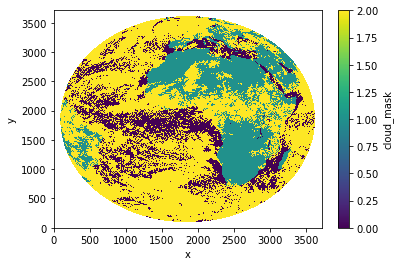

In [27]:
cloudMask.cloudMask.plot()

## 3. Regrid chosen ERA-pixel from test-file

In [1]:
import json
import glob

import xarray as xr
import numpy as np
import pandas as pd

from calc_fractional_cover import calc_fraction_one_cell, clean_file, save_dir, area_grid_cell, compute

In [2]:
compute?

Signature: compute(satfil, lats=None, lons=None)
Docstring:
Function for computing the cloudfractions for lists of latitudes and longitudes.

Parameters 
    satfil (str) : filename
    lats List[str]: list of latitude values  
    lons List[str]: list of longitudinal values
    
Returns
    fractions (pd.DataFrame) : pandas dataframe of the fractions 
    pair (List[Tuple[str, str]
File:      ~/european-cloud-cover/calc_fractional_cover.py
Type:      function


In [5]:
lats=['45.25']
lons=['-15.0']
satfil = 'satfile_new_dimensions.nc'
fraction, _ = compute(satfil=satfil, lats=lats, lons=lons)

In [6]:
fraction

,45.25
-15.0,0.962447


# Read same grid and compare it to ECC

In [6]:
data = xr.open_dataset(satfil)
data.time_coverage_start

'20190612113000'